In [1]:
# create and summarize a stationary version of the time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96

In [2]:
# create a differenced series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)

In [3]:
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')

In [4]:
# difference data
stationary = difference(X)

In [6]:
stationary.head()

0    30.0
1    11.0
2     0.0
3    16.0
4    45.0
dtype: float64

In [7]:
stationary.index = series.index[1:]

In [8]:
stationary.head()

0
1886-01-01    30.0
1887-01-01    11.0
1888-01-01     0.0
1889-01-01    16.0
1890-01-01    45.0
dtype: float64

In [9]:
# check if stationary
result = adfuller(stationary)

In [10]:
result

(-6.126718808474714,
 8.593851954694127e-08,
 1,
 66,
 {'1%': -3.5335601309235605,
  '10%': -2.590723948576676,
  '5%': -2.9064436883991434},
 536.3131001999539)

In [11]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.126719
p-value: 0.000000
Critical Values:
	10%: -2.591
	1%: -3.534
	5%: -2.906


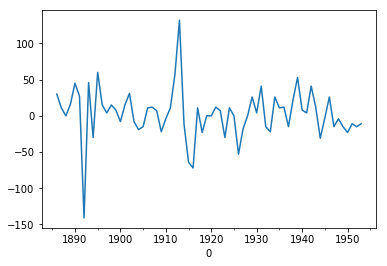

In [12]:
# plot differenced data
stationary.plot()
pyplot.show()

In [13]:
# save
stationary.to_csv('stationary.csv')

In [14]:
# ACF and PACF plots of the time series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


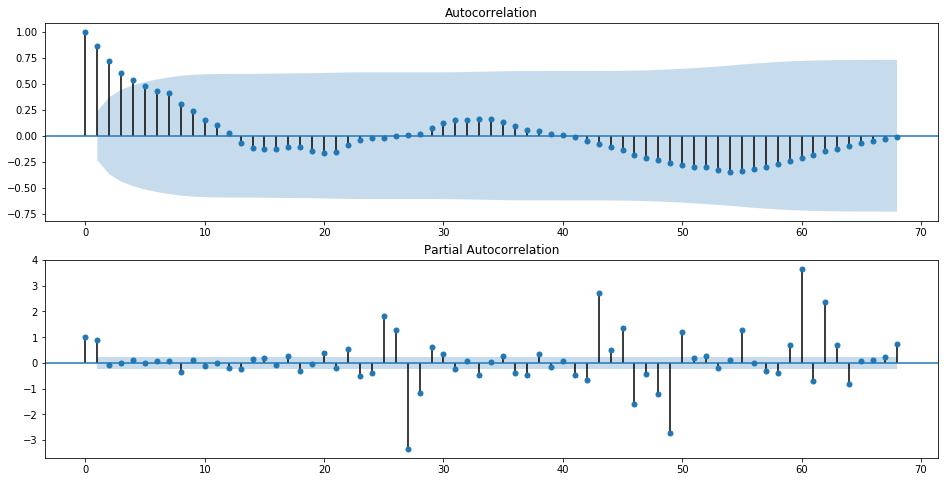

In [20]:
pyplot.figure(figsize=(16,8))
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [21]:
# evaluate a manually configured ARIMA model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [22]:
# prepare data
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [23]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=548.319, Expected=503
>Predicted=545.085, Expected=503
>Predicted=546.061, Expected=515
>Predicted=550.660, Expected=522
>Predicted=552.011, Expected=492
>Predicted=519.221, Expected=503
>Predicted=527.953, Expected=503
>Predicted=534.026, Expected=450
>Predicted=474.119, Expected=432
>Predicted=456.458, Expected=432
>Predicted=465.408, Expected=458
>Predicted=481.425, Expected=462
>Predicted=476.155, Expected=503
>Predicted=511.083, Expected=488
>Predicted=497.183, Expected=466
>Predicted=460.301, Expected=492
>Predicted=506.310, Expected=503
>Predicted=515.928, Expected=515
>Predicted=516.368, Expected=500
>Predicted=504.364, Expected=522
>Predicted=525.885, Expected=575
>Predicted=579.358, Expected=583
>Predicted=575.313, Expected=587
>Predicted=573.357, Expected=628
>Predicted=622.134, Expected=640
>Predicted=632.300, Expected=609
>Predicted=595.783, Expected=606
>Predicted=602.447, Expected=632
>Predicted=635.946, Expected=617
>Predicted=614.238, Expected=613
>Predicted

In [24]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 31.097
